Download LEHD data at block level and join with block shapefile.

### Install / load packages

In [1]:
# pip install pygris

In [2]:
from pygris.data import get_lodes
from pygris import blocks
from pygris import places
import pandas as pd
import geopandas as gpd

C:\Users\jpg23\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jpg23\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jpg23\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load LEHD data using `get_lodes` function from `pygris`

In [3]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [4]:
lehd = []

for which_state in states:
    
    try:
    
        state_lehd = get_lodes(
            state = which_state, 
            year = 2019, # data from 2019
            version = "LODES8", # uses 2020 census blocks
            lodes_type = "wac", 
            agg_level = "block"
        )

        state_lehd["state"] = which_state

        lehd.append(state_lehd)
    
    except:
        
        pass

In [5]:
df = pd.concat(lehd)[["state", "w_geocode", "C000"]]

In [6]:
df

state        w_geocode  C000
0       AL  010010201001000     2
1       AL  010010201001001     2
2       AL  010010201001002     1
3       AL  010010201001012    28
4       AL  010010201001019    15
...    ...              ...   ...
8844    WY  560459513003039     3
8845    WY  560459513003040     1
8846    WY  560459513003043     5
8847    WY  560459513003044    67
8848    WY  560459513003050     4

[2294854 rows x 3 columns]

In [7]:
df.state.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

In [8]:
df.state.nunique()

48

### Load block group shapefiles (and land area)

In [9]:
bl = []

for which_state in states:
    
    try:
    
        state_bl = blocks(state = which_state, year = 2020) # load 2020 boundaries to match LODES8 boundaries

        state_bl["state"] = which_state

        bl.append(state_bl)
    
    except:
        
        pass

Using FIPS code '01' for input 'AL'
Using FIPS code '02' for input 'AK'
Using FIPS code '04' for input 'AZ'
Using FIPS code '05' for input 'AR'
Using FIPS code '06' for input 'CA'
Using FIPS code '08' for input 'CO'
Using FIPS code '09' for input 'CT'
Using FIPS code '10' for input 'DE'
Using FIPS code '12' for input 'FL'
Using FIPS code '13' for input 'GA'
Using FIPS code '15' for input 'HI'
Using FIPS code '16' for input 'ID'
Using FIPS code '17' for input 'IL'
Using FIPS code '18' for input 'IN'
Using FIPS code '19' for input 'IA'
Using FIPS code '20' for input 'KS'
Using FIPS code '21' for input 'KY'
Using FIPS code '22' for input 'LA'
Using FIPS code '23' for input 'ME'
Using FIPS code '24' for input 'MD'
Using FIPS code '25' for input 'MA'
Using FIPS code '26' for input 'MI'
Using FIPS code '27' for input 'MN'
Using FIPS code '28' for input 'MS'
Using FIPS code '29' for input 'MO'
Using FIPS code '30' for input 'MT'
Using FIPS code '31' for input 'NE'
Using FIPS code '32' for inp

In [10]:
bl_sf0 = pd.concat(bl)
bl_sf0.head()

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
0        01        133    965700      3025  011339657003025  Block 3025   
1        01        015    001600      1026  010150016001026  Block 1026   
2        01        015    001101      2065  010150011012065  Block 2065   
3        01        015    002502      1053  010150025021053  Block 1053   
4        01        033    020300      3003  010330203003003  Block 3003   

  MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0   G5040    R    NaN      NaN          S    27642         0  +34.2430014   
1   G5040    U  02629        U          S   124157         0  +33.7081655   
2   G5040    R    NaN      NaN          S   242040         0  +33.5832632   
3   G5040    R    NaN      NaN          S    40222         0  +33.8556542   
4   G5040    U  29953        U          S    22668         0  +34.7611216   

     INTPTLON20  HOUSING20  POP20  \
0  -087.6271966          5     15   
1  -085.8594188         10     20   
2  -085.7919734          3     17   
3  -085.9163828          1      2   
4  -087.7092484         36     68   

                                            geometry state  
0  POLYGON ((-87.62818 34.24378, -87.62790 34.243...    AL  
1  POLYGON ((-85.86498 33.71246, -85.86495 33.712...    AL  
2  POLYGON ((-85.79456 33.58557, -85.79437 33.585...    AL  
3  POLYGON ((-85.91755 33.85641, -85.91734 33.856...    AL  
4  POLYGON ((-87.71026 34.76094, -87.71001 34.761...    AL

In [12]:
bl_sf = bl_sf0[["state", "GEOID20", "ALAND20", "geometry"]]

In [13]:
bl_sf.head()

state          GEOID20  ALAND20  \
0    AL  011339657003025    27642   
1    AL  010150016001026   124157   
2    AL  010150011012065   242040   
3    AL  010150025021053    40222   
4    AL  010330203003003    22668   

                                            geometry  
0  POLYGON ((-87.62818 34.24378, -87.62790 34.243...  
1  POLYGON ((-85.86498 33.71246, -85.86495 33.712...  
2  POLYGON ((-85.79456 33.58557, -85.79437 33.585...  
3  POLYGON ((-85.91755 33.85641, -85.91734 33.856...  
4  POLYGON ((-87.71026 34.76094, -87.71001 34.761...

In [14]:
bl_sf.state.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [15]:
bl_sf.state.nunique()

50

In [20]:
bl_sanfran = bl_sf.loc[bl_sf.GEOID20.str.contains('^06075'), :]

<AxesSubplot:>

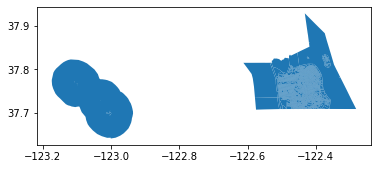

In [21]:
bl_sanfran.plot()

### Join LEHD data and shapefile

In [22]:
df.dtypes

state        object
w_geocode    object
C000          int64
dtype: object

In [23]:
bl_sf.dtypes

state         object
GEOID20       object
ALAND20        int64
geometry    geometry
dtype: object

In [24]:
df.head()

state        w_geocode  C000
0    AL  010010201001000     2
1    AL  010010201001001     2
2    AL  010010201001002     1
3    AL  010010201001012    28
4    AL  010010201001019    15

In [25]:
bl_sf.head()

state          GEOID20  ALAND20  \
0    AL  011339657003025    27642   
1    AL  010150016001026   124157   
2    AL  010150011012065   242040   
3    AL  010150025021053    40222   
4    AL  010330203003003    22668   

                                            geometry  
0  POLYGON ((-87.62818 34.24378, -87.62790 34.243...  
1  POLYGON ((-85.86498 33.71246, -85.86495 33.712...  
2  POLYGON ((-85.79456 33.58557, -85.79437 33.585...  
3  POLYGON ((-85.91755 33.85641, -85.91734 33.856...  
4  POLYGON ((-87.71026 34.76094, -87.71001 34.761...

In [26]:
df.shape[0]

2294854

In [27]:
bl_sf.shape[0]

8126956

In [28]:
df[df['state'] == 'AR']

state        w_geocode  C000
0    AR  050350306021068     8
1    AR  050350306023086     5
2    AR  050350306023087    15

In [29]:
bl_sf[bl_sf['state'] == 'AR'].head()

state          GEOID20  ALAND20  \
0    AR  050879601003037   176590   
1    AR  050419505001040   378184   
2    AR  050419502001011  2939946   
3    AR  050419501001361     3266   
4    AR  050419502001095  1222542   

                                            geometry  
0  POLYGON ((-93.79979 36.15195, -93.79974 36.155...  
1  POLYGON ((-91.41833 33.66584, -91.41617 33.665...  
2  POLYGON ((-91.39053 33.88275, -91.39053 33.882...  
3  POLYGON ((-91.29135 33.96857, -91.29125 33.968...  
4  POLYGON ((-91.40804 33.86847, -91.40804 33.868...

In [30]:
bl_sf.dtypes

state         object
GEOID20       object
ALAND20        int64
geometry    geometry
dtype: object

In [31]:
df.dtypes

state        object
w_geocode    object
C000          int64
dtype: object

In [32]:
final_df = bl_sf.merge(df, how = 'left', left_on = ['state', 'GEOID20'], right_on = ['state', 'w_geocode']).drop(columns = ['w_geocode']).rename(columns={"C000": "total_jobs", "ALAND20": "land_area", "GEOID20": "block"})

In [33]:
final_df.shape[0]

8126956

In [34]:
final_df.head()

state            block  land_area  \
0    AL  011339657003025      27642   
1    AL  010150016001026     124157   
2    AL  010150011012065     242040   
3    AL  010150025021053      40222   
4    AL  010330203003003      22668   

                                            geometry  total_jobs  
0  POLYGON ((-87.62818 34.24378, -87.62790 34.243...         NaN  
1  POLYGON ((-85.86498 33.71246, -85.86495 33.712...         NaN  
2  POLYGON ((-85.79456 33.58557, -85.79437 33.585...         NaN  
3  POLYGON ((-85.91755 33.85641, -85.91734 33.856...         NaN  
4  POLYGON ((-87.71026 34.76094, -87.71001 34.761...         NaN

In [35]:
final_df[final_df['total_jobs'].notnull()].head()

state            block  land_area  \
5     AL  011030051013020      31480   
11    AL  011339657002038      10199   
12    AL  011339657002045      12201   
13    AL  010059509001007     379331   
27    AL  010770112001055      13337   

                                             geometry  total_jobs  
5   POLYGON ((-87.09421 34.58765, -87.09412 34.587...        17.0  
11  POLYGON ((-87.61417 34.22864, -87.61388 34.228...         4.0  
12  POLYGON ((-87.61606 34.22792, -87.61588 34.227...         1.0  
13  POLYGON ((-85.16563 31.85972, -85.16544 31.860...        27.0  
27  POLYGON ((-87.71796 34.80829, -87.71773 34.808...         5.0

In [36]:
final_df.total_jobs.isnull().mean()

0.7176244094344796

In [37]:
final_df.state.nunique()

50

In [38]:
df_states = df.state.unique().tolist()
final_df_states = final_df.state.unique().tolist()

list(set(df_states).difference(final_df_states))

[]

In [39]:
type(final_df)

geopandas.geodataframe.GeoDataFrame

### Subset to cities of interest

In [40]:
city_list = [
  'Albuquerque NM',
  'Atlanta GA',
  'Austin TX',
  'Bakersfield CA',
  'Baltimore MD',
  'Boston MA',
  'Charlotte NC',
  'Chicago IL',
  'Cincinnati OH',
  'Cleveland OH',
  'Colorado Springs CO',
  'Columbus OH',
  'Dallas TX',
  'Denver CO',
  'Detroit MI',
  'El Paso TX',
  'Fort Worth TX',
  'Fresno CA',
  'Urban Honolulu HI',
  'Houston TX',
  'Indianapolis city (balance) IN',
  'Jacksonville FL',
  'Kansas City MO',
  'Las Vegas NV',
  'Los Angeles CA',
  'Louisville KY',
  'Memphis TN',
  'Miami FL',
  'Milwaukee WI',
  'Minneapolis MN',
  'Nashville-Davidson metropolitan government (balance) TN',
  'New Orleans LA',
  'New York NY',
  'Oakland CA',
  'Oklahoma City OK',
  'Omaha NE',
  'Orlando FL',
  'Philadelphia PA',
  'Phoenix AZ',
  'Pittsburgh PA',
  'Portland OR',
  'Raleigh NC',
  'Sacramento CA',
  'Salt Lake City UT',
  'San Antonio TX',
  'San Diego CA',
  'San Francisco CA',
  'San Jose CA',
  'Seattle WA',
  'St. Louis MO',
  'Tampa FL',
  'Tucson AZ',
  'Tulsa OK',
  'Washington DC']

In [41]:
all_places = places(cb = True)

Using the default year of 2021
Retrieving Census-designated places for the entire United States


In [42]:
all_places.head()

STATEFP PLACEFP   PLACENS          AFFGEOID    GEOID           NAME  \
0      12   35000  02404783  1600000US1235000  1235000   Jacksonville   
1      01   32416  02403774  1600000US0132416  0132416   Guntersville   
2      01   81504  02406871  1600000US0181504  0181504       Westover   
3      01   26896  02403619  1600000US0126896  0126896       Florence   
4      20   47350  00485624  1600000US2047350  2047350  Mission Hills   

             NAMELSAD STUSPS STATE_NAME LSAD       ALAND     AWATER  \
0   Jacksonville city     FL    Florida   25  1935492088  329347337   
1   Guntersville city     AL    Alabama   25    66393352   44192114   
2       Westover town     AL    Alabama   43    51094431     382665   
3       Florence city     AL    Alabama   25    68681105     546506   
4  Mission Hills city     KS     Kansas   25     5276389       2474   

                                            geometry  
0  POLYGON ((-82.04933 30.27334, -82.04924 30.273...  
1  MULTIPOLYGON (((-86.24300 34.36247, -86.23766 ...  
2  MULTIPOLYGON (((-86.54358 33.35226, -86.54074 ...  
3  POLYGON ((-87.72248 34.81723, -87.71904 34.821...  
4  POLYGON ((-94.63043 39.00964, -94.63043 39.015...

In [43]:
pd.set_option('display.max_colwidth', None)
all_places.loc[all_places.NAME.str.contains('Nashville|Indianapolis|Honolulu|St\.? Louis'), :][['NAME', 'STUSPS']]

NAME STUSPS
868                                               Nashville     OH
1075   Nashville-Davidson metropolitan government (balance)     TN
5468                                              Nashville     KS
7767                            Indianapolis city (balance)     IN
7907                                         St. Louisville     OH
10770                                             Nashville     GA
11519                                             Nashville     MI
11684                                             St. Louis     OK
13505                                             Nashville     IN
13872                                        Urban Honolulu     HI
14952                                             St. Louis     MO
15797                                             St. Louis     MI
16291                                             Nashville     AR
16438                                        East St. Louis     IL
16535                                        St. Louis Park     MN
17398                                         Bay St. Louis     MS
21484                                             Nashville     IL
28365                                             Nashville     NC
29095                                         East Honolulu     HI
31322                                        Lake St. Louis     MO

In [44]:
all_places['city'] = all_places.apply(lambda x: '{} {}'.format(x['NAME'], x['STUSPS']), axis=1)

In [45]:
all_places.city.head()

0     Jacksonville FL
1     Guntersville AL
2         Westover AL
3         Florence AL
4    Mission Hills KS
Name: city, dtype: object

In [46]:
all_places_simp = all_places[['city', 'geometry']]
the_places = all_places_simp[all_places_simp['city'].isin(city_list)]

In [47]:
pd.reset_option('^display.', silent=True)
the_places.head()

city                                           geometry
0     Jacksonville FL  POLYGON ((-82.04933 30.27334, -82.04924 30.273...
120  Oklahoma City OK  POLYGON ((-97.83367 35.33536, -97.83119 35.335...
192      San Diego CA  MULTIPOLYGON (((-116.93264 32.64913, -116.9319...
567        Oakland CA  POLYGON ((-122.34225 37.80556, -122.33412 37.8...
761         Tucson AZ  POLYGON ((-111.05873 32.20679, -111.05446 32.2...

In [48]:
the_places.city.unique()

array(['Jacksonville FL', 'Oklahoma City OK', 'San Diego CA',
       'Oakland CA', 'Tucson AZ', 'Louisville KY',
       'Nashville-Davidson metropolitan government (balance) TN',
       'Memphis TN', 'Sacramento CA', 'Fort Worth TX', 'Portland OR',
       'Chicago IL', 'Colorado Springs CO', 'Denver CO', 'New Orleans LA',
       'Detroit MI', 'Philadelphia PA', 'Tulsa OK', 'Cleveland OH',
       'Dallas TX', 'El Paso TX', 'Omaha NE', 'Washington DC',
       'Bakersfield CA', 'Tampa FL', 'Milwaukee WI', 'Los Angeles CA',
       'Seattle WA', 'Indianapolis city (balance) IN', 'Pittsburgh PA',
       'Albuquerque NM', 'Boston MA', 'New York NY', 'Atlanta GA',
       'San Jose CA', 'Columbus OH', 'Miami FL', 'Minneapolis MN',
       'Salt Lake City UT', 'Orlando FL', 'Urban Honolulu HI',
       'St. Louis MO', 'Houston TX', 'Fresno CA', 'Las Vegas NV',
       'Cincinnati OH', 'San Francisco CA', 'San Antonio TX',
       'Baltimore MD', 'Phoenix AZ', 'Kansas City MO', 'Charlotte NC',
      

In [49]:
the_places.city.nunique()

54

In [50]:
in_places = the_places.city.unique().tolist()

list(set(city_list).difference(in_places))

[]

In [51]:
final_df.crs == the_places.crs

True

In [52]:
df_joined = gpd.sjoin(final_df, the_places, how = "inner").drop(columns = ['index_right'])

In [53]:
df_joined.head()

state            block  land_area  \
214558    AZ  040131167123012      14414   
214561    AZ  040131166141024      18021   
214563    AZ  040131124022001      17553   
214564    AZ  040131126022005      12624   
214579    AZ  040136124012015       7769   

                                                 geometry  total_jobs  \
214558  POLYGON ((-111.99095 33.29417, -111.99046 33.2...         NaN   
214561  POLYGON ((-112.08986 33.38057, -112.08766 33.3...         NaN   
214563  POLYGON ((-112.17301 33.47250, -112.17070 33.4...         NaN   
214564  POLYGON ((-112.14312 33.45574, -112.14234 33.4...         NaN   
214579  POLYGON ((-112.03655 33.68886, -112.03654 33.6...         NaN   

              city  
214558  Phoenix AZ  
214561  Phoenix AZ  
214563  Phoenix AZ  
214564  Phoenix AZ  
214579  Phoenix AZ

In [54]:
sf_test = df_joined[df_joined['city']=='San Francisco CA']

<AxesSubplot:>

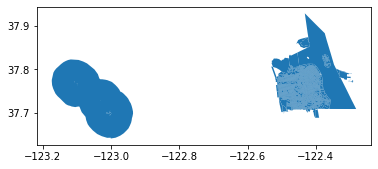

In [55]:
sf_test.plot()

In [56]:
sf_test2 = final_df.loc[final_df.block.str.contains('^06075'), :]

<AxesSubplot:>

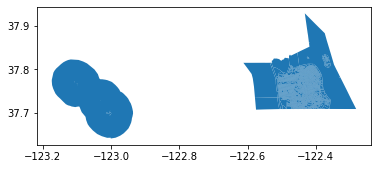

In [57]:
sf_test2.plot()

In [58]:
df_joined['jobs_per_sq_meter'] = df_joined['total_jobs']/df_joined['land_area']

In [59]:
df_joined.head()

state            block  land_area  \
214558    AZ  040131167123012      14414   
214561    AZ  040131166141024      18021   
214563    AZ  040131124022001      17553   
214564    AZ  040131126022005      12624   
214579    AZ  040136124012015       7769   

                                                 geometry  total_jobs  \
214558  POLYGON ((-111.99095 33.29417, -111.99046 33.2...         NaN   
214561  POLYGON ((-112.08986 33.38057, -112.08766 33.3...         NaN   
214563  POLYGON ((-112.17301 33.47250, -112.17070 33.4...         NaN   
214564  POLYGON ((-112.14312 33.45574, -112.14234 33.4...         NaN   
214579  POLYGON ((-112.03655 33.68886, -112.03654 33.6...         NaN   

              city  jobs_per_sq_meter  
214558  Phoenix AZ                NaN  
214561  Phoenix AZ                NaN  
214563  Phoenix AZ                NaN  
214564  Phoenix AZ                NaN  
214579  Phoenix AZ                NaN

In [60]:
df_joined.land_area.mean()

64722.98861920761

In [61]:
sanfran_chor = df_joined[df_joined['city']=='San Francisco CA']
sanfran_chor.head()

state            block  land_area  \
508811    CA  060750204024001       3349   
508812    CA  060750260031011      16165   
508813    CA  060750230032004      14007   
508814    CA  060750233002011      19578   
508815    CA  060750101011005      15453   

                                                 geometry  total_jobs  \
508811  POLYGON ((-122.44319 37.75604, -122.44298 37.7...         NaN   
508812  POLYGON ((-122.43121 37.72086, -122.43003 37.7...         6.0   
508813  POLYGON ((-122.39807 37.73202, -122.39745 37.7...         8.0   
508814  POLYGON ((-122.39587 37.72828, -122.39410 37.7...        59.0   
508815  POLYGON ((-122.41584 37.80897, -122.41557 37.8...       414.0   

                    city  jobs_per_sq_meter  
508811  San Francisco CA                NaN  
508812  San Francisco CA           0.000371  
508813  San Francisco CA           0.000571  
508814  San Francisco CA           0.003014  
508815  San Francisco CA           0.026791

In [62]:
sanfran_chor.explore(
    column="total_jobs",
    tooltip="total_jobs",
    tiles="CartoDB positron",
    style_kwds=dict(alpha=.5)
)

### Export as geodataframe

In [63]:
df_joined.to_file("C:/Users/jpg23/data/downtownrecovery/lehd_new_downtowns/cities_lehd_jobs_block.geojson", driver="GeoJSON")  